<a href="https://colab.research.google.com/github/endar1y12/ML/blob/main/Tugas_Besar_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



NAIVE BAYES
#Nama : Daryanti
#NPM  : 5210411176






In [ ]:
#dataset
import pandas as pd
import numpy as np

dataku = pd.read_csv("/content/Telco-Customer-Churn.csv")# data diabetes
print(dataku)#menampilkan data yang ada di csv

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [ ]:
dataku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#mengubah data menjadi numerik
from sklearn.preprocessing import LabelEncoder #library
le = LabelEncoder()

for col in dataku.columns.values:
  #encoding pada variabel kategori dan boolean
  if dataku[col].dtypes=='object' or dataku[col].dtype=='bool':
    data = dataku[col].append(dataku[col])
    le.fit(data.values)
    dataku[col] = le.transform(dataku[col])

dataku.head(12) #menampilkan data dalam bentuk tabel dan hanya menampilkan 12 data dari 7043 data yang ada


<ipython-input-35-407a96327fab>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = dataku[col].append(dataku[col])
<ipython-input-35-407a96327fab>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = dataku[col].append(dataku[col])
<ipython-input-35-407a96327fab>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = dataku[col].append(dataku[col])
<ipython-input-35-407a96327fab>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = dataku[col].append(dataku[col])
<ipython-input-35-407a96327fab>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
5,6551,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,6104,1
6,1002,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1550,0
7,4770,0,0,0,0,10,0,1,0,2,...,0,0,0,0,0,0,3,29.75,2609,0
8,5604,0,0,1,0,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,2646,1
9,4534,1,0,0,1,62,1,0,0,2,...,0,0,0,0,1,0,0,56.15,3022,0


In [ ]:
#melihat jumlah data null
dataku.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#memisahkan fitur dan label

fitur = dataku[dataku.columns[:-1]] # untuk fitur
label= dataku[dataku.columns[-1]]  #untuk label
print("\nFitur:\n",fitur)
print("\nLabelx:\n",label)


Fitur:
       customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  \
0                0              1                0      

In [ ]:
#import gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

#buat model
model = GaussianNB()

#train
model.fit(fitur.values,label)

#prediksi
predicted = model.predict([,4,0,4,0,2,0,4,1,2,2],[3,1,4,0,2,0,2,1,0,0,0,1,2,0,2,0,4,1,2,3],[3,0,4,2,0,3,0,0,5,4,3,1,2,0,2,0,4,1,2,3]]) # glucose # bloodpressure
print("Predicted:",predicted)
truelabel = [1,0,1]
print("True Label",truelabel)

Predicted: [1 1 0]
True Label [1, 0, 1]


0.7563538264943916


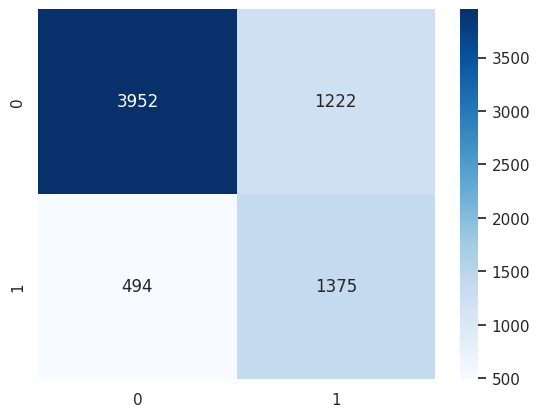

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns;sns.set()
ac = accuracy_score(label,model.predict(fitur.values))
score = confusion_matrix(label,model.predict(fitur.values))

print(ac)
ax = sns.heatmap(score,annot=True,fmt="d",cmap="Blues")